# Repairing structures along an Ensemble

By repairing a structure:

- All incomplete sidechains will be completed.
- Residues with high energy will be self-mutated to try rotamers that minimize the energy.

To repair en ensemble of structures is as simple as call the *repair()* method. The *inPlace* parameter determines if the original ensemble will be overwritten with the repaired structures or a new ensemble will be created. By passing a list of residues in FoldX format to the *fixResidues* parameter these residues will not be taken into account for repair.

In [1]:
# This simulates the installation the user will just import pyFoldx.Ensemble
import sys
sys.path.append("/home/lradusky/Dropbox/workspacesbg/pyFoldX")

In [2]:
from pyfoldx.structure import UniprotEnsemble

In [3]:
#Some other imports, to work with the data and to plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We want to print full tables
pd.set_option("display.max_rows", 1000, "display.max_columns", 1000)

We will create a *UniprotEnsemble* object with high quality structures of the HRAS gene.

In [4]:
working_path = "/home/lradusky/Downloads/P01112/ensemble.pdb"
t = UniprotEnsemble("P01112", working_path, just_xray=True, max_resolution=1.3)

Master Structure is 2CLD:
Aligning to master (total: 10)
100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
Ensemble built
Total structures aligned: 5


Let's observe the energies of the loaded structures.

In [5]:
t.getTotalEnergy()

Computing total energy for ensemble...
  0%|          | 0/5 [00:00<?, ?it/s]

/home/lradusky/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100%|██████████| 5/5 [00:05<00:00,  1.04s/it]
Energy computed.


,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,sloop_entropy,mloop_entropy,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
2CL7_X,86.3362,-111.538,-27.1663,-199.993,-18.1606,308.318,-254.679,40.6932,103.697,253.43,0,0,0,6.59941,116.92,-5.47509,0,0,0,-9.97267,0.582727,0
2CL6_X,69.755,-113.582,-32.3997,-192.621,-12.5027,274.64,-249.601,38.2709,104.77,249.038,0,0,0,7.91374,109.843,-1.50458,0,0,0,-3.41804,0.751419,0
2CLC_A,92.9158,-109.512,-30.7435,-200.43,-18.0479,311.126,-254.739,45.4465,103.444,254.547,0,0,0,7.56739,115.278,-5.68071,0,0,0,-10.6392,0.577303,0
2CE2_A,74.2691,-111.987,-33.1809,-206.373,-16.8864,307.313,-265.363,36.1388,106.577,251.418,0,0,0,14.0768,120.183,-3.7513,0,0,0,-3.8686,0.156981,0
2EVW_X,93.7085,-111.043,-29.4907,-192.17,-12.1502,279.614,-247.667,43.5986,103.598,252.935,0,0,0,13.3661,113.078,-0.735763,0,0,0,-6.70616,0.560584,0


Now, let's repair all the structures within the ensemble and save it to a file. 

In [6]:
t.repair()
t.toPdbFile(working_path+"repaired.pdb")

Repairing structures along ensemble...
  0%|          | 0/5 [00:00<?, ?it/s]

/home/lradusky/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100%|██████████| 5/5 [11:18<00:00, 135.65s/it]
Structures repaired.


AttributeError: 'UniprotEnsemble' object has no attribute 'saveToPDB'

And we can check that the energy of the structures was minimized.

In [7]:
t.getTotalEnergy()

Computing total energy for ensemble...
100%|██████████| 5/5 [00:05<00:00,  1.00s/it]
Energy computed.


,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,sloop_entropy,mloop_entropy,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
2CL7_X,13.2604,-122.108,-49.3533,-197.79,-19.0922,292.915,-255.626,14.2335,109.749,254.31,0,0,0,3.28385,115.541,-6.58689,0,0,0,-11.0252,0.350747,0
2CL6_X,-12.7321,-124.333,-64.6417,-195.85,-14.6605,270.587,-256.883,8.13899,117.077,247.96,0,0,0,4.27695,110.024,-1.81657,0,0,0,-3.34857,0.761272,0
2CLC_A,11.8157,-121.411,-56.8251,-200.794,-19.283,299.454,-259.002,15.8924,114.098,253.694,0,0,0,3.22969,115.299,-7.39787,0,0,0,-10.8028,0.963989,0
2CE2_A,4.4419,-122.365,-53.2274,-204.404,-17.3958,291.616,-265.994,12.598,109.299,252.223,0,0,0,10.7867,119.48,-5.22164,0,0,0,-3.8686,0.394709,0
2EVW_X,-4.16664,-125.209,-65.927,-190.14,-13.1496,266.571,-247.852,10.48,113.524,252.835,0,0,0,3.44004,113.182,-3.07186,0,0,0,-6.41483,0.747188,0


In [9]:
resDf = t.getResiduesEnergy()
resDf

Computing residue energy for ensemble...
100%|██████████| 5/5 [00:05<00:00,  1.05s/it]
Energy computed.


2CL7_X      2CL6_X       2CLC_A      2CE2_A      2EVW_X
Code Mol Pos                                                               
MET  X   1        -1.18065      -1.507     -1.12094    -1.20158    0.694414
THR  X   2         1.11742      0.7194      1.41374    0.465675     1.58261
GLU  X   3         1.04166     0.82995     0.532794    0.848406    0.664207
TYR  X   4        -3.11286    -3.89966     -3.11026    -3.03031    -2.73687
LYS  X   5       -0.411231   -0.435132    -0.499582   -0.114824   -0.817616
LEU  X   6        -2.43269    -2.49468     -2.56262    -2.63696    -2.44714
VAL  X   7         -2.4116    -2.49328      -2.5264    -2.48446    -2.48154
         8         -2.4127    -2.64118     -2.37464    -2.52331     -2.4935
         9        -2.05659    -1.90766       -2.063    -1.73756    -2.41251
GLY  X   10        1.98068     1.52031       2.1035     1.07072     1.13156
ALA  X   11    -0.00641739    0.133917    0.0319681  -0.0329008     0.83269
GLY  X   12        1.21437     1.38491      1.21305     1.13795     1.24686
         13       0.411862    0.307051     0.399569    0.313534    0.277875
VAL  X   14      -0.916169    -1.89713    -0.829241    -1.40186   -0.765865
GLY  X   15      -0.507772     1.67776    -0.618177    -1.34515     1.15639
LYS  X   16       0.221196     1.08852     0.559496    0.058578    0.874929
SER  X   17       -1.22437     -0.7823     -1.50734   -0.380041     -1.3544
ALA  X   18       0.219024   -0.198308      0.38908  -0.0961222    0.144834
LEU  X   19       -2.46111    -2.42805     -2.45807    -2.52988    -2.51217
THR  X   20      -0.213562    0.249497    -0.252581    0.111122   -0.156366
ILE  X   21       -1.73528    -1.64382     -2.00392    -1.52361    -1.85424
GLN  X   22       0.242093    0.262465    -0.473492   -0.373453  -0.0395181
LEU  X   23      -0.593811    -1.85596     -1.82608    -1.79642    -3.00248
ILE  X   24       -2.53405    -1.58985     -2.58298    -1.72569    -1.99958
GLN  X   25        2.53665     2.68031      1.65167     1.10516     1.42775
ASN  X   26        2.22555     1.43897      2.15296     1.97746      1.9925
H2S  X   27        2.19193         NaN          NaN         NaN         NaN
PHE  X   28       -2.01022   -0.784973     -1.35981    -1.78447   -0.996786
VAL  X   29        1.32116    0.585188      0.85454    0.401386    0.654859
ASP  X   30        1.59883    0.756513       1.5882     1.58707      1.4731
GLU  X   31        1.33945     2.27723       1.7894     2.71566     1.18175
CYS  X   32       0.866374     3.24095     0.347934     1.14583    0.585331
ASP  X   33        1.21481    0.278066      1.28234    0.432626     1.14197
PRO  X   34        1.20294    0.772849       1.2418   0.0101092     0.19836
THR  X   35        2.65322    0.307394    -0.350827    0.617061   -0.477971
ILE  X   36        4.89548  -0.0631596      3.40505    0.723668     1.82877
GLU  X   37        2.72606     1.55749      3.35704     1.53315     1.40995
ASP  X   38        1.46213     1.92184      1.53854     1.35657     1.12128
SER  X   39        1.22283    0.170891      1.43657     1.93675     1.22806
TYR  X   40       -1.28878    -2.78421     -1.45658   -0.530765    -1.63741
ARG  X   41        1.05827     1.48311      1.25964    0.896402     0.99524
LYS  X   42       0.410837     1.48517      1.44232     0.17456       1.068
GLN  X   43        1.23417    0.823178      1.25445    0.943706    0.924926
VAL  X   44      -0.805003    -1.90792    -0.941635    -1.90811    -1.10245
         45       0.878578    0.603409      1.13155    0.781831      1.1032
ILE  X   46       -2.85779    -3.39515     -2.26213    -2.33517    -2.60597
ASP  X   47          0.594    0.741221     0.552449    0.696764    0.474758
GLY  X   48        0.80234    0.898837     0.812528    0.762711    0.778668
GLU  X   49       0.366505    0.354852     0.618097    0.990943    0.137422
THR  X   50        1.01438    0.994066     0.729719     1.15825     1.03966
CYS  X   51      -0.154627   -0.524501     0.127507   -0.512922   -0

/home/lradusky/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


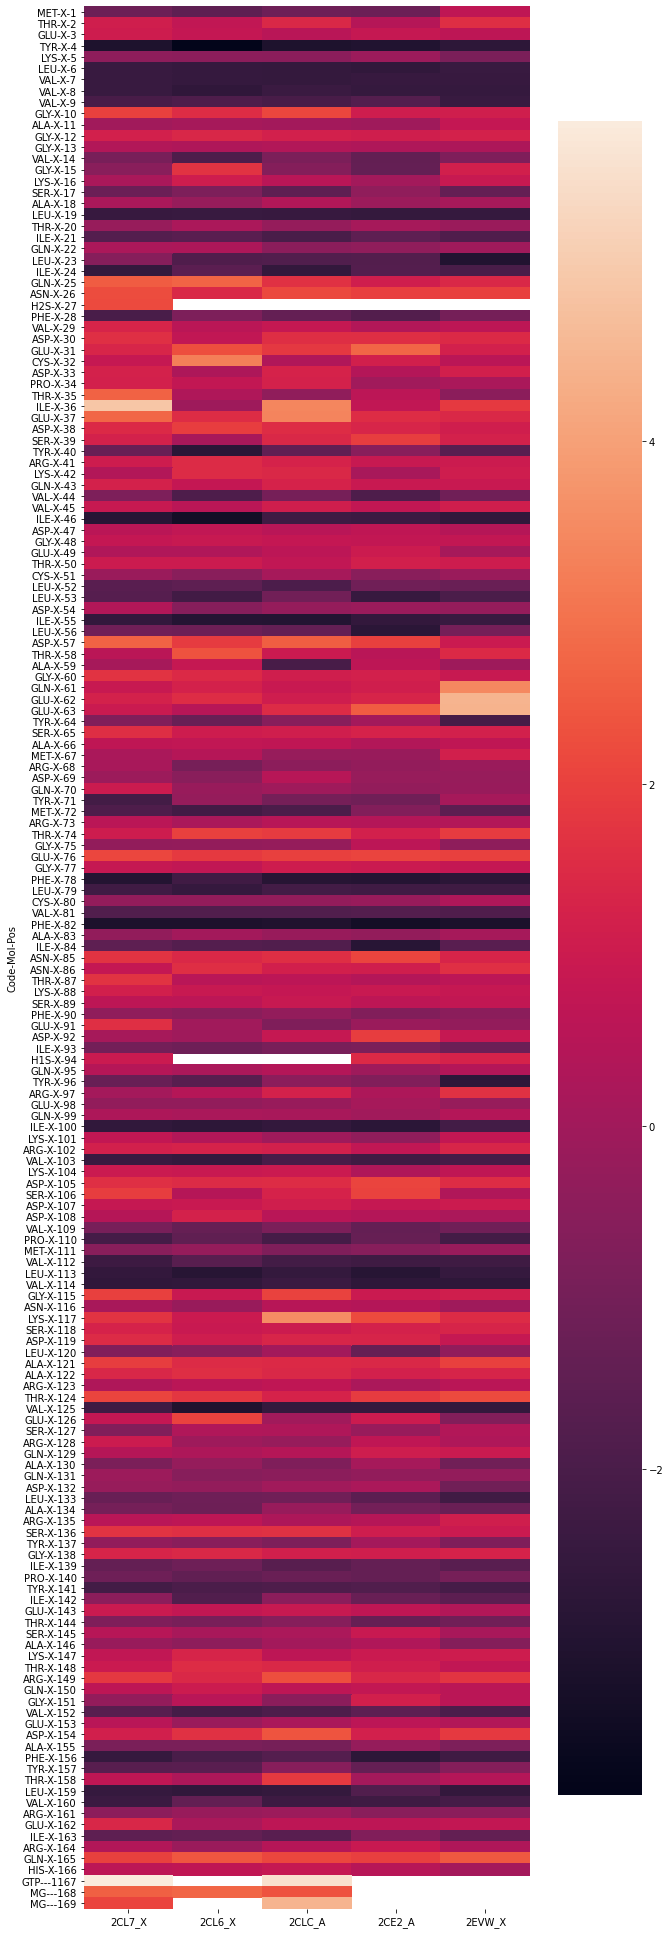

In [12]:
plt.figure(figsize=(10,35))
sns.heatmap(resDf.astype("double"))